<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
#подключение библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor

In [2]:
# загрузка данных
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


# Вывод:
- надо изменить тип столбца date на datetime(сейчас object)
- в данных присутствуют пропуски

In [9]:
# изменим тип данных в столбце data
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')

In [10]:
# проверим наличие явных дубликатов
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())
print(full_data.duplicated().sum())

0
0
0


***Так как по условию задачи соседние по времени параметры часто похожи, заполним отсутствующие значения в тренировочной и тестовой выборках c помощью функции ffill.***

In [11]:
#избавимся от пропусков. 
train_data = train_data.ffill(axis=0)
test_data = test_data.ffill(axis=0)
full_data = full_data.ffill(axis=0)

In [12]:
print(train_data.shape)
print(test_data.shape)
print(full_data.shape)
print(len(train_data.notna()))
print(len(test_data.notna()))
print(len(full_data.notna()))

(14149, 87)
(5290, 53)
(19439, 87)
14149
5290
19439


***Пропусков нет.***

# Проверка формулы эффиктивности обогащения

- вычислим её на обучающей выборке для признака rougher.output.recovery 
- найдем MAE между полученными значениями и значением признака

Условия: 
- С - доля золота в концентрате после очитски (rougher.output.concentrate_au)
- F - доля золота в сырье/концентрате до очистки (rougher.input.feed_au)
- T - доля золота в отвальных хвостах после очистки (rougher.output.tail_au)
- Значение нужного признака - rougher.output.recovery

In [13]:
c = train_data['rougher.output.concentrate_au']
f = train_data['rougher.input.feed_au']
t = train_data['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100

print('MAE =', mean_absolute_error(train_data['rougher.output.recovery'], recovery))

MAE = 9.73512347450521e-15


Признак MAE очень мал - рассчеты верны.

# Анализ признаков, недоступных в тетовой выборке

In [14]:
missed_signs = set(train_data.columns) - set(test_data.columns)
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [15]:
print('\nКоличество отсутствующих признаков -', len(missed_signs))


Количество отсутствующих признаков - 34


В тесте отсутствуют параметры, которые обозначают характеристики этапов обработки, также содержат расчетные характеристики и целевые значения эффективности обогащения. В тестовой выборке отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые нужны для расчета метрики качества. 

In [16]:
test_data = test_data.merge(full_data.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [17]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)

# Вывод

- Данные были заргужены и изучены.
- Пропуски в датасетах (тренировочная выборки и тестовая) были заполнены значениями предшествующими по времени.
- Проверена правильность расчета эффективности обогащения.
- В сравнение с тренировчной выборкой в тестовой отсутствуют 34 значения. Это скорее всего связано с тем, что они замеряются позже.
- В тестовую выборку были добавлены целевые признаки (rougher.output.recovery, final.output.recovery), которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.


## Анализ данных

Посмотрим, как меняется конЯцентрация металлов (Au, Ag, Pb) на различных этапах очистки.

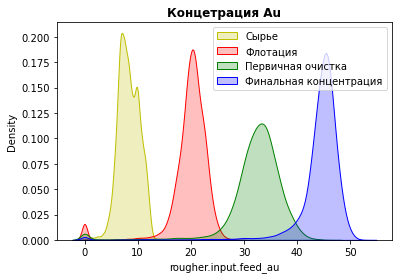

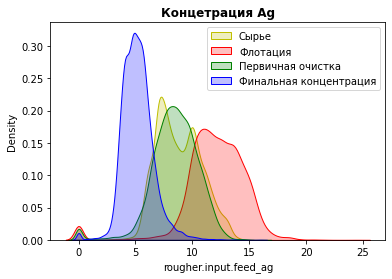

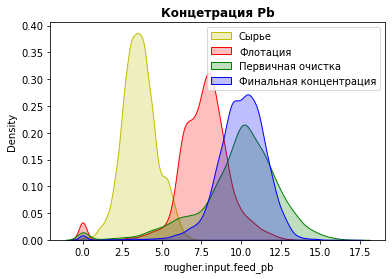

In [18]:
plt.title('Концетрация Au', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_au'],color='y', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_au'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_au'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_au'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "Финальная концентрация" ], loc=1)     
plt.show()

plt.title('Концетрация Ag', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_ag'],color='y', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_ag'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_ag'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_ag'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "Финальная концентрация" ], loc=1)     
plt.show()

plt.title('Концетрация Pb', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_pb'],color='y', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_pb'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_pb'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_pb'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "Финальная концентрация" ], loc=1)      
plt.show()

- Концентрация золота увеличивается после каждого этапа очистки
- Концентрация серебра увеличивается после флотации и уменьшается после следующих этапов
- Концентрация свинца снижается после первого этапа очистки 

Посмотрим распределения размеров гранул сырья

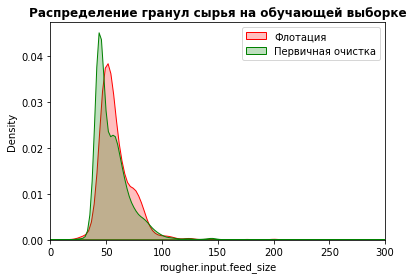

In [19]:
plt.title('Распределение гранул сырья на обучающей выборке', fontweight='bold')
fig = sns.kdeplot(train_data['rougher.input.feed_size'],color='r', legend=True,shade=True)
fig = sns.kdeplot(test_data['rougher.input.feed_size'],color='g', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка'], loc=1)     
plt.xlim(0, 300)
plt.show()

In [20]:
feed_size_train = train_data['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на обучающей выборке:',feed_size_train)
feed_size_test = test_data['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на тестовой выборке:',feed_size_test)

Среднее распределение гранул на обучающей выборке: 60.23985599255732
Среднее распределение гранул на тестовой выборке: 55.952754028895136


Посмотрим суммарную концентрацию всех веществ на разных стадиях

In [21]:
full_data['raw'] = full_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
full_data['rough concentrate'] = full_data[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
full_data['primary concentrate'] = full_data[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
full_data['final concentrate'] = full_data[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

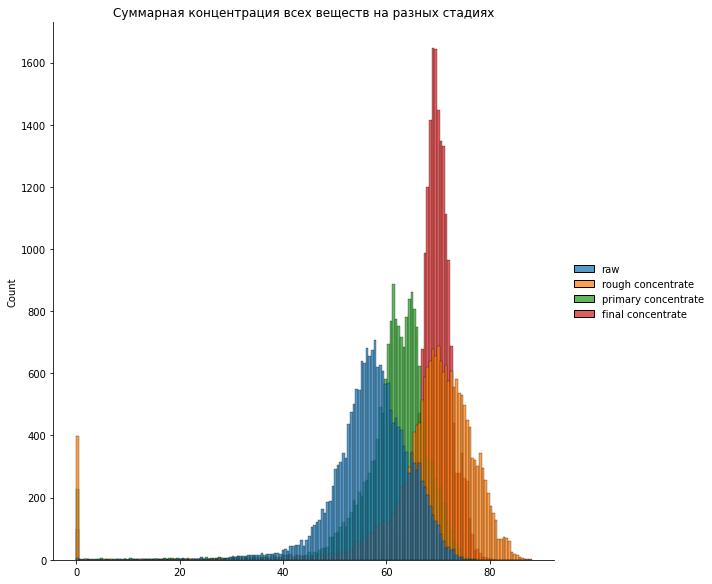

In [22]:
sns.displot(full_data[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']], legend=True,  height=8)  
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.show()

Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.

Для финального этапа и этапа флотации в суммарной концентрации веществ присутствуют аномалии ( значения в районе 0).
Стоит удалить аномалии из данных, так как они могут негативно повлиять на качество обучения модели.

In [23]:
train_data = train_data[(train_data['rougher.output.concentrate_au'] != 0) & (train_data['rougher.output.concentrate_ag'] != 0) & (train_data['rougher.output.concentrate_pb'] != 0) & (train_data['rougher.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['final.output.concentrate_au'] != 0) & (train_data['final.output.concentrate_ag'] != 0) & (train_data['final.output.concentrate_pb'] != 0) & (train_data['final.output.concentrate_sol'] != 0)]

full_data = full_data[(full_data['rougher.output.concentrate_au'] != 0) & (full_data['rougher.output.concentrate_ag'] != 0) & (full_data['rougher.output.concentrate_pb'] != 0) & (full_data['rougher.output.concentrate_sol'] != 0)]
full_data = full_data[(full_data['final.output.concentrate_au'] != 0) & (full_data['final.output.concentrate_ag'] != 0) & (full_data['final.output.concentrate_pb'] != 0) & (full_data['final.output.concentrate_sol'] != 0)]

# Вывод

- Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют
- Доля золота увеличивается по мере прохождения этапов очистки
- В анализа суммарной концентрации веществ на разных стадиях были выявлены аномалии, которые были удалены для улучшения качества модели.

## Модель

В начале следует удалить отсутствующие в тестовой выборке признакииз тренировочной(кроме целевых)

In [24]:
signs_for_delete = missed_signs - set(['rougher.output.recovery','final.output.recovery'])

In [25]:
train_data = train_data.drop(columns=signs_for_delete, axis=1)

Функция вычисления sMAPE

In [26]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [27]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

Функция вычисления итогового sMAPE

In [28]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

Подготовим данные для обучения моделей

In [29]:
features_for_train_df = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train_df = train_data['rougher.output.recovery']
target_for_final_on_train_df = train_data['final.output.recovery']

In [30]:
dct_with_scores = {}

In [31]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train_df,
                          target_for_rougher_on_train_df,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_for_train_df,
                        target_for_final_on_train_df,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 1.68 s, sys: 2.14 s, total: 3.81 s
Wall time: 3.81 s


In [32]:
%%time
state = RandomState(12345)
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train_df,
                              target_for_rougher_on_train_df,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train_df,
                                  target_for_final_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 25.2 s, sys: 2.74 ms, total: 25.2 s
Wall time: 25.2 s


In [33]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train_df,
                                  target_for_rougher_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_for_train_df,
                                target_for_final_on_train_df,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 12min 42s, sys: 855 ms, total: 12min 43s
Wall time: 12min 43s


In [34]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.059261443482796

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 8.925785452030949

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 8.529258429567625


Лучшая модель - Лес, далее будем работать с ней и  Применим ее на тестовой выборкею.

In [35]:
print('\nЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - 10, MAX_DEPTH - 4


In [36]:
features_for_test_df = test_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test_df = test_data['rougher.output.recovery']
target_for_final_on_test_df = test_data['final.output.recovery']

In [37]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
predicted_rougher = model_for_test_rougher.predict(features_for_test_df)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_final.fit(features_for_train_df, target_for_final_on_train_df)
predicted_final = model_for_test_final.predict(features_for_test_df)

smape_for_test_rougher = get_smape(target_for_rougher_on_test_df, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test_df, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [38]:
print(f'\nSMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - {final_smape_for_test}')


SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - 9.504033186609172


In [39]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
dummy_regr_for_final.fit(features_for_train_df, target_for_final_on_train_df)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test_df)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test_df)

smape_for_const_rougher = get_smape(target_for_rougher_on_test_df, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test_df, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [40]:
print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027


***Показатель модели RandomForestRegressor меньше показателя константной, что означает хорошее качество полученной модели.***

Вывод:
- Лучшая модель - RandomForestRegressor
- Модель проверена на адекватность, ее показатель SMAPE меньше показателя константной модели.

# Вывод


- Данные были загржены в датасет и проанализированны.
- Была проведена предобработка данных, были удалены аномальные значения и проверено распределение веществ для обучающей и тестовой выборки
- Моделью с лучшими результатами прогноза является - RandomForestRegressor
- Модель прошла проверку на адекватность.
- По результатам исследования видно, что  доля золота и серебра увеличичвается с течением технологического процесса, а свинца уменьшается. Общее суммарное количество веществ уменьшается по мере прохождения этапов обработки.

# Чек-лист проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке